In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from SceneR2.dataset import *

In [3]:
with open('../data/Daimler/100_vids/pickled_SceneR2_dataset/pickled_MovObj2_cleaned_157_26Feb','rb') as f:
    dataset = pickle.load(f)

In [4]:
data0_csv = SingleCAN.fromCSV(dataset.can[1], supressPostABA=False, verbose=True)

[]
ABAReactionIndex:  353
ABAReactionStopIndex: 425
Edge_0:  []
Edge_1:  []


In [5]:
dataset.play(1)

Name:  SceneR2.dataset


In [6]:
import cv2

In [7]:
multiplier = 640/4
fix_dy = lambda y: int(-y*multiplier+640/2)
putLine = lambda img,pos: cv2.line(img, (pos,0), (pos,480), (255,0,0), 2)
cap = cv2.VideoCapture(data0_csv.vid_file)
video = []
ret=True
while(ret):
    ret,img = cap.read()
    if ret:
        video.append(img)
video = np.stack(video)

In [8]:
data0_csv.dy.shape

(997,)

In [9]:
data0_csv.file_id

'20170211_043609'

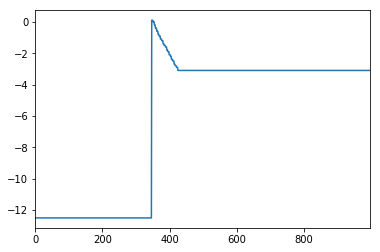

In [28]:
data0_csv.df['RDF_dy_Ped0'].plot()

In [11]:
video.shape

(498, 480, 640, 3)

Frame No:  179    csv_idx:  358
384 -0.4


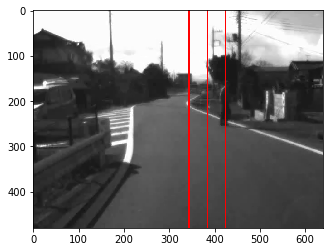

In [47]:
i=179
print('Frame No: ',str(i), '   csv_idx: ',str(i*2))
print(fix_dy(data0_csv.dy[i*2]), data0_csv.dy[i*2])
frame = video[i,:,:,:].copy()
putLine(frame, fix_dy(data0_csv.dy[i*2]))
putLine(frame, fix_dy(data0_csv.dy[i*2])-40)
putLine(frame, fix_dy(data0_csv.dy[i*2])+40)
plt.imshow(frame)

In [17]:
ped_files = [filename for filename in tqdm(glob(globalVariables.path_to_csv+'/[1-9]*.csv')) if SingleCAN.get_relevant_object(read_csv_auto(filename)) in [2,3]]

100%|██████████| 100/100 [01:01<00:00,  1.64it/s]


In [19]:
[vid_from_csv(SingleCAN.get_file_id(f)) for f in ped_files]

['../data/Daimler/100_vids/videos/20170211_043609_Video.mp4',
 '../data/Daimler/100_vids/videos/20170308_082612_Video.mp4',
 '../data/Daimler/100_vids/videos/20170407_223559_Video.mp4']

In [37]:
Video('../data/Daimler/100_vids/videos/20170407_223559_Video.mp4')

In [41]:
[(i,f) for i,f in enumerate(dataset.can) if SingleCAN.get_file_id(f)=='20170407_223559']

[(35,
  '/home/sufiyan/data/Daimler/100_vids/csv/20170407_223559_S235_500K_V173015_LW_DML.csv')]

Reason for Braking:  Pedestrian A
Label:  2
edgePostABA:  931


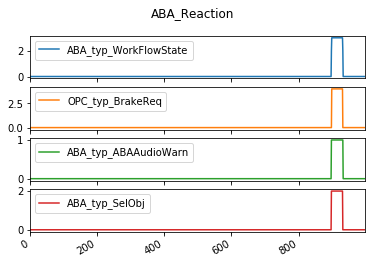

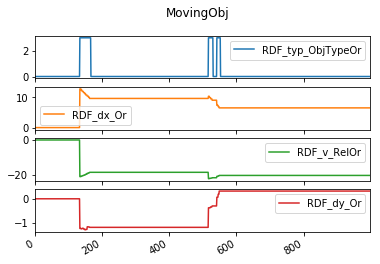

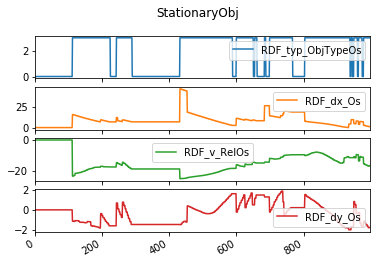

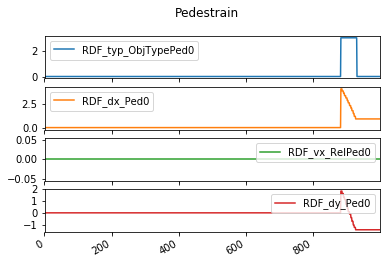

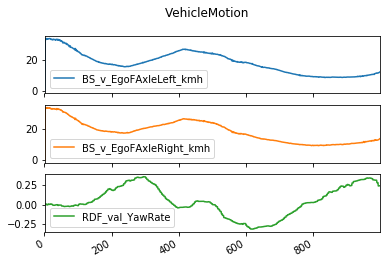

In [44]:
dataset.plot(35, all_columns=True, supressPostABA=False)